In [1]:
from hyperimpute.plugins.imputers import Imputers, ImputerPlugin
from Impute import fill_with_et
from hyperimpute.plugins.utils.metrics import RMSE

imputers = Imputers()


class EtImputer(ImputerPlugin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._model = fill_with_et

    @staticmethod
    def name():
        return "et"

    @staticmethod
    def hyperparameter_space():
        return []

    def _fit(self, *args, **kwargs):
        return self

    def _transform(self, df):
        # 按照缺失值的比例进行排序
        miss_rate = df.isnull().sum() / df.shape[0]
        cols = miss_rate.sort_values().index.tolist()
        cols = [col for col in cols if miss_rate[col] > 0]
        for col in cols:
            df_col_filled = self._model(df, col)
            df[col] = df_col_filled[col]
        return df


imputers.add("et", EtImputer)

hyper = imputers.get("hyperimpute", n_inner_iter=1)
et = imputers.get("et")
missforest = imputers.get("missforest")
gain = imputers.get("gain")
sinkhorn = imputers.get("sinkhorn")
mean = imputers.get("mean")

D:\software\miniconda\Lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
import pandas as pd

df = pd.read_csv("./dataset/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df = df.select_dtypes(include=["float64", "int64"])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
from hyperimpute.plugins.utils.simulate import simulate_nan
import numpy as np

np.random.seed(42)
X = df
# reindex
cols = X.columns.tolist()
X = np.array(X)

sim_df = simulate_nan(X, 0.1, mecha="MAR")
X = pd.DataFrame(X, columns=cols)
X_with_nan = sim_df["X_incomp"]
mask = sim_df["mask"]
X_with_nan = pd.DataFrame(X_with_nan, columns=cols)
X_with_nan

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,NaN,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,NaN,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,NaN,2.02,NaN,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [5]:
X_filled_et = et.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_et.values, mask))

X_filled_et

RMSE:  0.9938747646842148


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.4900,1.1000,71.7800,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.6000,1.3600,72.7300,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.5500,1.5400,72.6795,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.6900,1.2900,72.6100,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.6200,1.2400,73.0800,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.0000,2.8800,72.6100,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.0000,1.9198,73.0600,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,1.0924,2.0200,72.5233,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.0000,1.9400,73.6100,0.00,8.48,1.57,0.0,7.0


In [6]:
X_filled_hyper = hyper.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_hyper.values, mask))

X_filled_hyper

RMSE:  1.1564372678676398


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.490000,1.100000,71.780000,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.600000,1.360000,72.730000,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.550000,1.540000,72.800021,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.690000,1.290000,72.610000,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.620000,1.240000,73.080000,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.880000,72.610000,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.000000,2.079129,73.060000,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,1.516483,2.020000,71.802041,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.000000,1.940000,73.610000,0.00,8.48,1.57,0.0,7.0


In [7]:
X_filled_missforest = missforest.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_missforest.values, mask))

X_filled_missforest

RMSE:  1.06569873255134


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.490000,1.100000,71.780000,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.600000,1.360000,72.730000,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.550000,1.540000,72.748292,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.690000,1.290000,72.610000,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.620000,1.240000,73.080000,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.880000,72.610000,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.000000,2.061351,73.060000,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.602022,2.020000,72.593524,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.000000,1.940000,73.610000,0.00,8.48,1.57,0.0,7.0


In [8]:
X_filled_gain = gain.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_gain.values, mask))

X_filled_gain

RMSE:  1.2226482761345954


,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.490000,1.100000,71.780000,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.600000,1.360000,72.730000,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.550000,1.540000,72.977371,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.690000,1.290000,72.610000,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.620000,1.240000,73.080000,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.880000,72.610000,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.000000,2.283458,73.060000,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.434530,2.020000,72.732132,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.000000,1.940000,73.610000,0.00,8.48,1.57,0.0,7.0


In [9]:
# set  X_filled_gain cols
X_filled_gain.columns = X.columns
X_filled_gain

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.490000,1.100000,71.780000,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.600000,1.360000,72.730000,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.550000,1.540000,72.977371,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.690000,1.290000,72.610000,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.620000,1.240000,73.080000,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.880000,72.610000,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.000000,2.283458,73.060000,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.434530,2.020000,72.732132,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.000000,1.940000,73.610000,0.00,8.48,1.57,0.0,7.0


In [10]:
X_filled_sinkhorn = sinkhorn.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_sinkhorn.values, mask))


RMSE:  1.5321162116982119


In [11]:
X_filled_sinkhorn.columns = X.columns

X_filled_sinkhorn

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.490000,1.100000,71.780000,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.600000,1.360000,72.730000,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.550000,1.540000,72.696515,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.690000,1.290000,72.610000,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.620000,1.240000,73.080000,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.880000,72.610000,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.000000,2.192435,73.060000,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,2.031353,2.020000,72.731822,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.000000,1.940000,73.610000,0.00,8.48,1.57,0.0,7.0


In [12]:
X_filled_mean = mean.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_mean.values, mask))

X_filled_mean.columns = X.columns
X_filled_mean

RMSE:  1.782808832772206


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.490000,1.100000,71.780000,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.600000,1.360000,72.730000,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.550000,1.540000,72.657672,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.690000,1.290000,72.610000,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.620000,1.240000,73.080000,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.000000,2.880000,72.610000,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.000000,1.431333,73.060000,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,2.781604,2.020000,72.657672,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.000000,1.940000,73.610000,0.00,8.48,1.57,0.0,7.0


In [13]:
missing_columns = X_with_nan.columns[X_with_nan.isnull().any()].tolist()
missing_columns

['Mg', 'Al', 'Si', 'Ca', 'Type of glass']

In [14]:
col = missing_columns[0]
col_mean = X[col].mean()
col_std = X[col].std()
# 统计在填充前缺失值在一个std距离内的缺失值
col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
col_missing_values = X_with_nan.loc[col_missing_index, col]
original_values = X.loc[col_missing_index, col]
original_values

14     3.59
23     3.57
35     3.45
51     3.33
52     2.87
54     2.81
61     3.58
88     3.50
97     3.25
106    0.00
116    3.90
122    3.54
162    3.78
163    2.68
171    0.00
179    2.19
183    0.00
185    3.20
186    3.26
189    1.83
193    0.00
194    0.00
200    0.00
205    0.00
207    0.00
211    0.00
213    0.00
Name: Mg, dtype: float64

et: Mg score_std: 0.6589340245625783, score_2std: 0.3712030860000566, score_3std: nan
hyper: Mg score_std: 0.4816050217885039, score_2std: 1.23710791411435, score_3std: nan
missforest: Mg score_std: 0.6659992039885665, score_2std: 0.5761034924799511, score_3std: nan
gain: Mg score_std: 0.7793468269069268, score_2std: 0.7073273735307952, score_3std: nan
sinkhorn: Mg score_std: 0.4188848187697241, score_2std: 1.2411164956787075, score_3std: nan
mean: Mg score_std: 0.4725079967568397, score_2std: 1.9284450566231575, score_3std: nan
et: Al score_std: 0.5263346188911092, score_2std: 1.1304572486357318, score_3std: 3.1557118911903985
hyper: Al score_std: 0.5802199123055494, score_2std: 0.9941341033604932, score_3std: 2.961126011939729
missforest: Al score_std: 0.5738093320473378, score_2std: 0.9806757225762507, score_3std: 2.9854327919232144
gain: Al score_std: 0.6744350084675674, score_2std: 1.1193649083092874, score_3std: 2.9513873613698314
sinkhorn: Al score_std: 0.5244598920899504, score

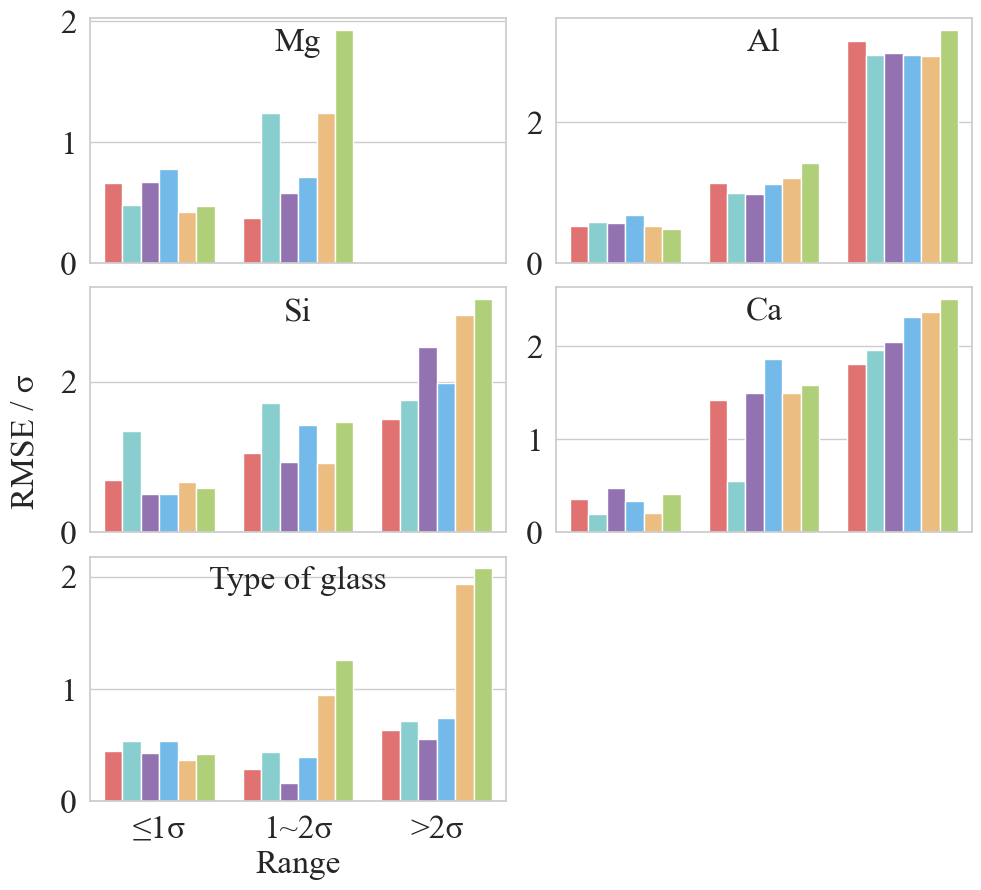

In [15]:
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.metrics import root_mean_squared_error as rmse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#5FBDFF", "#FDBF6F", "#B3DE69", "#FFC0D9"])

cols = 2
rows = len(missing_columns) // cols if len(missing_columns) % cols == 0 else len(missing_columns) // cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows), sharex=True)
axs = axs.flatten()

all_df = pd.DataFrame(columns=["RMSE", "Method", "Range", "Col"])

for col in missing_columns:
    ax = axs[missing_columns.index(col)]
    df = pd.DataFrame(columns=["RMSE", "Method", "Range"])

    col_mean = X[col].mean()
    col_std = X[col].std()
    # 统计在填充前缺失值在一个std距离内的缺失值
    col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
    col_missing_values = X_with_nan.loc[col_missing_index, col]
    original_values = X.loc[col_missing_index, col]
    count = {"1": [], "2": [], "3": []}
    for idx, val in zip(col_missing_index, original_values):
        if abs(val - col_mean) > 2 * col_std:
            count["3"].append(idx)
        elif abs(val - col_mean) > 1 * col_std:
            count["2"].append(idx)
        else:
            count["1"].append(idx)
    col_mean = abs(col_mean)
    score_std = rmse(original_values[count["1"]], X_filled_et.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_et.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_et.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"et: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MatImpute", "MatImpute", "MatImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_hyper.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_hyper.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_hyper.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"hyper: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["HyperImpute", "HyperImpute", "HyperImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_missforest.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_missforest.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_missforest.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"missforest: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MissForest", "MissForest", "MissForest"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_gain.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_gain.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_gain.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"gain: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Gain", "Gain", "Gain"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_sinkhorn.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_sinkhorn.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_sinkhorn.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"sinkhorn: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Sinkhorn", "Sinkhorn", "Sinkhorn"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    # mean
    score_std = rmse(original_values[count["1"]], X_filled_mean.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_mean.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_mean.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"mean: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Mean", "Mean", "Mean"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)
    df["Col"] = [col] * df.shape[0]
    all_df = pd.concat([all_df, df], ignore_index=True)

    df.drop(columns=["Col"], inplace=True)

    sns.barplot(x="Range", y="RMSE", hue="Method", data=df, ax=ax, palette=my_palette)
    # del legend
    ax.get_legend().remove()
    # del y label
    ax.set_ylabel("")
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    # set x label size
    ax.set_xlabel("Range", fontsize=24)
    # 把标题添加到图的框内
    ax.text(0.5, 0.9, col, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
            fontsize=24)

# get legend
handles, labels = ax.get_legend_handles_labels()

# del empty subplot
for i in range(len(missing_columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
fig.text(0.02, 0.5, 'RMSE / σ', va='center', rotation='vertical', fontsize=24)
fig.subplots_adjust(hspace=0.1, wspace=0.12, left=0.1, bottom=0.1)
# plt.savefig("std-rmse.png", dpi=300)
all_df.to_excel("std-rmse-glass.xlsx", index=False)